In [211]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import minmax_scale
import numpy as np
import matplotlib.pyplot as plt

#### Données présentant la production totale d'énergie ( par type d'énergie , pompage et exportation )


Source = https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement

In [16]:
df = pd.read_excel(r'C:\Users\RAKOTONIAINA\NoteBook TELECOM\HACKATON\eCO2mix_RTE_Annuel-Definitif_2018.xlsx')

In [17]:
df.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
0,France,Données définitives,2018-01-01,00:00:00,61127.0,56800.0,58900.0,164.0,36.0,2462.0,...,-1.0,2159.0,224.0,80.0,5997.0,1624.0,391.0,600.0,291.0,277.0
1,France,Données définitives,2018-01-01,00:15:00,NaN,56250.0,58300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,France,Données définitives,2018-01-01,00:30:00,59962.0,55700.0,57700.0,108.0,18.0,2471.0,...,8.0,2158.0,226.0,79.0,6100.0,2558.0,212.0,580.0,281.0,258.0
3,France,Données définitives,2018-01-01,00:45:00,NaN,54800.0,56750.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,France,Données définitives,2018-01-01,01:00:00,57879.0,53900.0,55800.0,107.0,17.0,2474.0,...,8.0,2162.0,225.0,78.0,6028.0,2364.0,194.0,581.0,279.0,258.0


In [33]:
type_energy = ['Date', 'Heures', 'Consommation','Fioul', 'Charbon', 'Gaz', 'Nucléaire','Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']
df2 = df.dropna(axis=0)

In [108]:
variation = df2[type_energy].set_index(['Date'])
variation['renewable_energy'] = variation['Eolien'] + variation['Solaire'] + variation['Hydraulique'] + variation['Bioénergies']
monthly_conso = variation.groupby(pd.Grouper(freq="M")).mean()

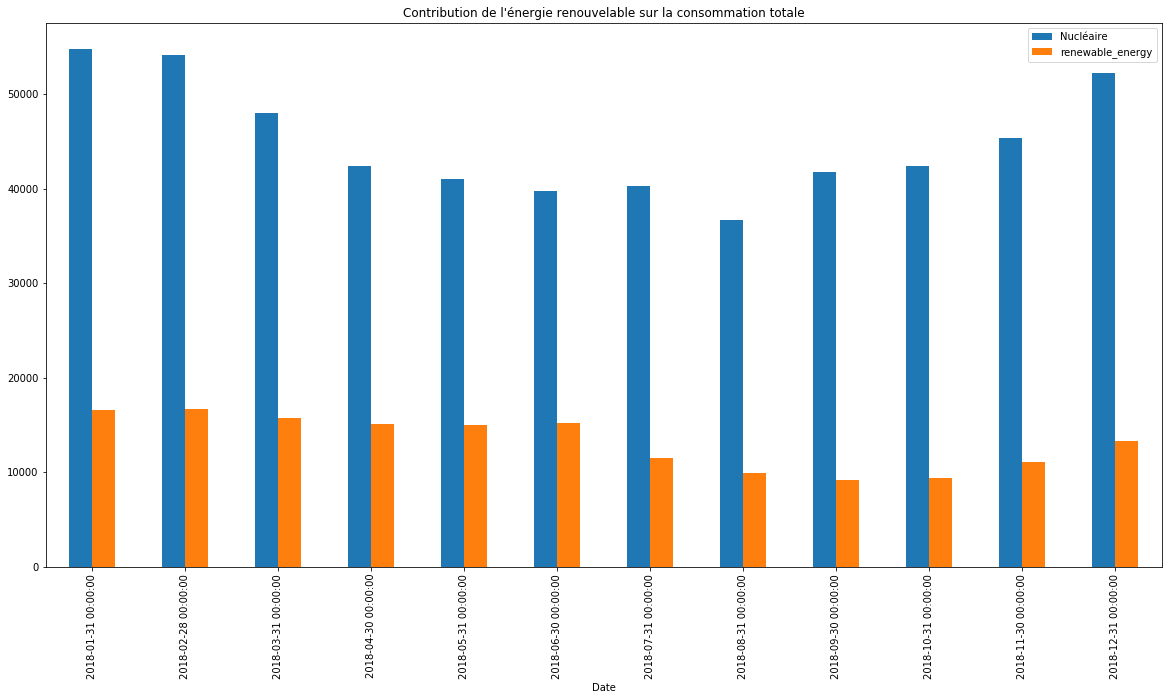

In [156]:
ax = monthly_conso[['Nucléaire','renewable_energy']].plot(kind='bar', figsize=(20,10),title ="Contribution de l'énergie renouvelable sur la consommation totale")

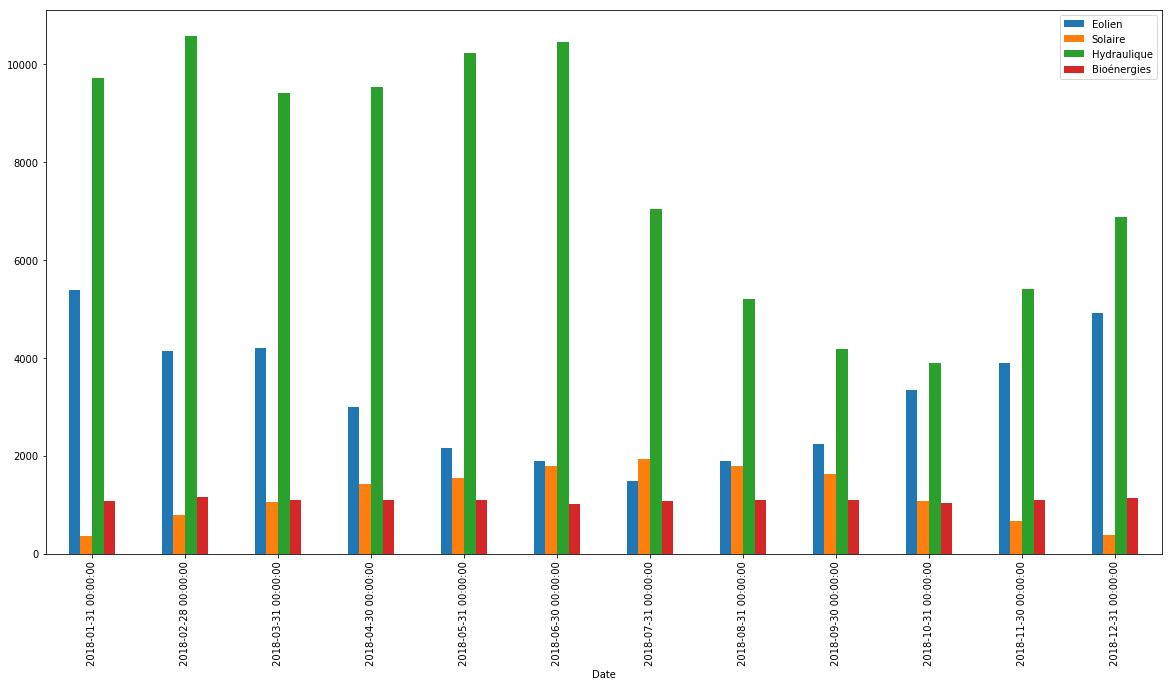

In [104]:
ax = monthly_conso[['Eolien', 'Solaire', 'Hydraulique','Bioénergies']].plot(kind='bar', figsize=(20,10))

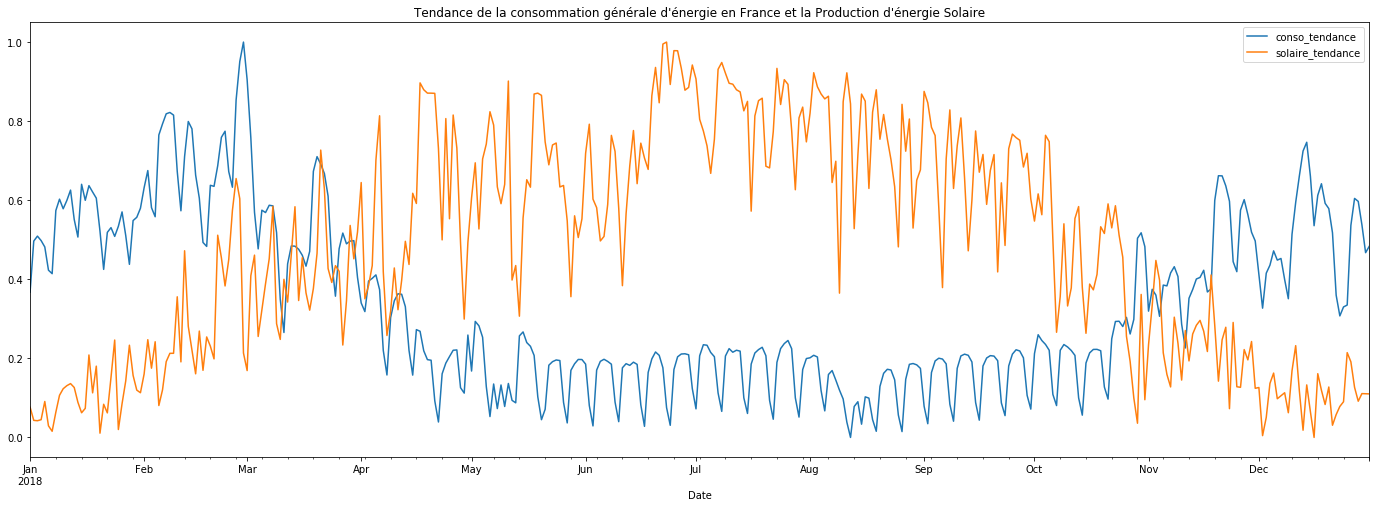

In [226]:
daily_conso = variation.groupby(['Date']).sum()
daily_conso['conso_tendance'] = minmax_scale(daily_conso['Consommation'])
daily_conso['solaire_tendance'] = minmax_scale(daily_conso['Solaire'])
daily_conso['charbon_tendance'] = minmax_scale(daily_conso['Charbon'])
daily_conso['eolien_tendance'] = minmax_scale(daily_conso['Eolien'])
daily_conso[['conso_tendance','solaire_tendance']].plot(figsize=(24,8),title ="Tendance de la consommation générale d'énergie en France et la Production d'énergie Solaire")

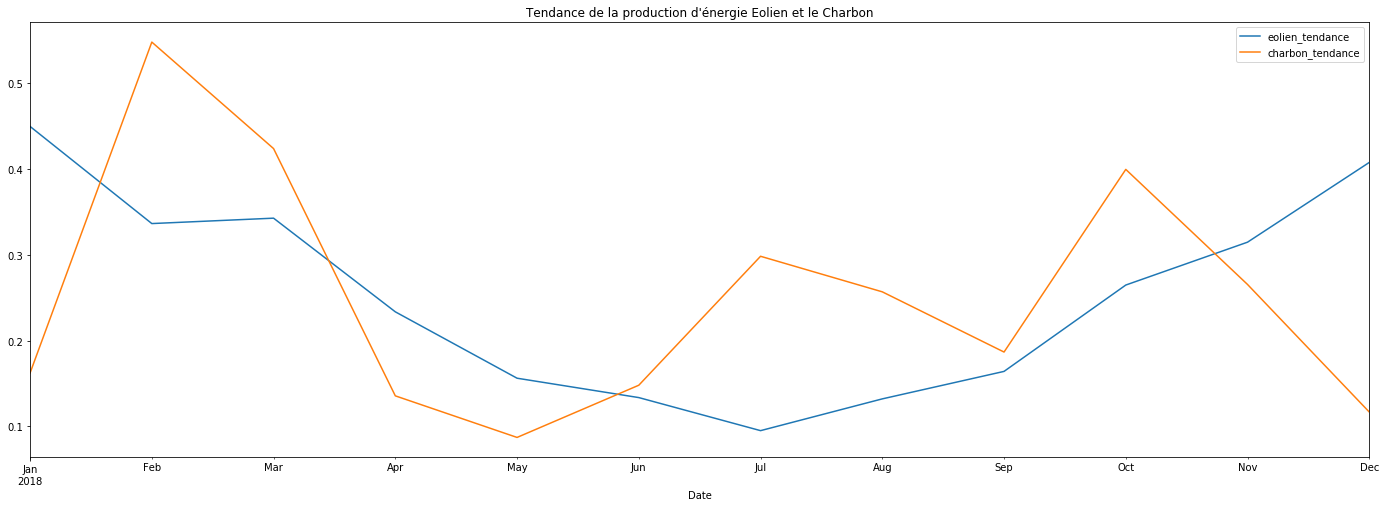

In [227]:
monthly_conso = daily_conso.groupby(pd.Grouper(freq="M")).mean()
monthly_conso[['eolien_tendance','charbon_tendance']].plot(figsize=(24,8),title ="Tendance de la production d'énergie Eolien et le Charbon")